In [ ]:
#Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Supply_chain = pd.read_excel('/content/drive/MyDrive/Supply Chain Dataset.xlsx')
Supply_chain.head(5)

,Type,Type Dummy,Days for shipment (scheduled),Shipping Mode Dummy,Shipping Mode,Order Status,Order Status dummy,Latitude,Longitude,Order Item Quantity,Late_delivery
0,PAYMENT,3,4,4,Standard Class,PENDING_PAYMENT,7,39.564655,-87.289413,2,1
1,DEBIT,2,4,4,Standard Class,COMPLETE,3,18.282019,-66.370567,4,1
2,DEBIT,2,4,4,Standard Class,ON_HOLD,4,33.993874,-117.767746,1,0
3,DEBIT,2,4,4,Standard Class,ON_HOLD,4,18.227573,-66.043434,3,1
4,DEBIT,2,4,4,Standard Class,COMPLETE,3,18.239571,-66.370613,3,1


In [ ]:
# Unique label of our prediction variable
print(Supply_chain['Late_delivery'].unique())
  # Here 1 indicates On-time delivery and 0 indicates delay in delivery.

[1 0]


In [ ]:
# Records under supply chian dataset.

print(Supply_chain.shape)

(180519, 11)


In [ ]:
#Data Statistics

Supply_chain.describe()

,Type Dummy,Days for shipment (scheduled),Shipping Mode Dummy,Order Status dummy,Latitude,Longitude,Order Item Quantity,Late_delivery
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,2.675137,2.931847,3.234806,4.886123,29.719955,-84.915675,2.127638,0.451709
std,0.994647,1.374449,1.100920,2.260851,9.813646,21.433241,1.453451,0.497664
min,1.000000,0.000000,1.000000,1.000000,-33.937553,-158.025986,1.000000,0.000000
25%,2.000000,2.000000,3.000000,3.000000,18.265432,-98.446312,1.000000,0.000000
50%,3.000000,4.000000,4.000000,4.000000,33.144863,-76.847908,1.000000,0.000000
75%,4.000000,4.000000,4.000000,7.000000,39.279617,-66.370583,3.000000,1.000000
max,4.000000,4.000000,4.000000,9.000000,48.781933,115.263077,5.000000,1.000000


In [ ]:
# Classes count

print(Supply_chain.groupby('Late_delivery').size())

Late_delivery
0    98977
1    81542
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


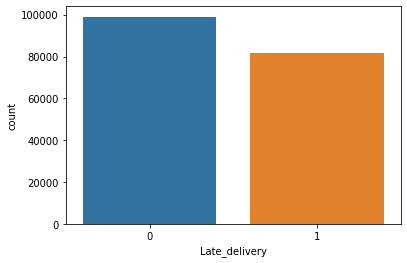

In [ ]:
# Graphical Summary of Categorical Prediction variable.
import seaborn as sns
sns.countplot(Supply_chain['Late_delivery'],label="Count")
plt.show()

Independent Variables Summary

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


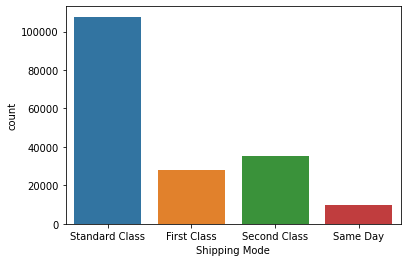

In [ ]:
# Shipping Mode Count
sns.countplot(Supply_chain['Shipping Mode'],label="Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


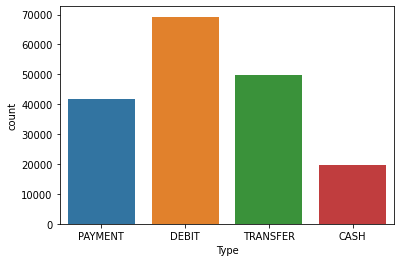

In [ ]:
# Payment Type Count
sns.countplot(Supply_chain['Type'],label="Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


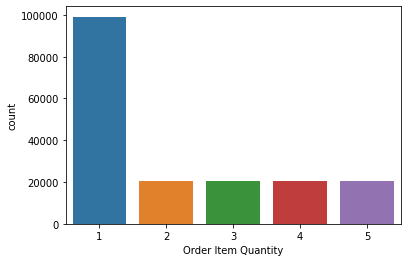

In [ ]:
# Order item count
sns.countplot(Supply_chain['Order Item Quantity'],label="Count")
plt.show()

In [ ]:
# Dataset Info to know variable is int or object because machine learning classifier works on int type variables.
Supply_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Type Dummy                     180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Shipping Mode Dummy            180519 non-null  int64  
 4   Shipping Mode                  180519 non-null  object 
 5   Order Status                   180519 non-null  object 
 6   Order Status dummy             180519 non-null  int64  
 7   Latitude                       180519 non-null  float64
 8   Longitude                      180519 non-null  float64
 9   Order Item Quantity            180519 non-null  int64  
 10  Late_delivery                  180519 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 15.1+ MB


Modelling

In [ ]:
# Feature Selection

feature_names = ['Days for shipment (scheduled)', 'Shipping Mode Dummy', 'Order Item Quantity',
                 'Latitude','Longitude','Type Dummy','Order Status dummy']
x = Supply_chain[feature_names]
y = Supply_chain['Late_delivery'] 



In [ ]:
#Spilitting train and test data. 

# train data = 80%
# test data  = 20%

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [ ]:
def classifiermodel(model_l,x_train, x_test,y_train,y_test):
   model_l = model_l.fit(x_train,y_train)
   y_pred=model_l.predict(x_test) 
   accuracy_l=accuracy_score(y_pred, y_test)
   recall_l=recall_score(y_pred, y_test)
   conf_l=confusion_matrix(y_test, y_pred)
   f1_l=f1_score(y_test, y_pred)
   print('Accuracy is:', (accuracy_l)*100,'%')
   print('Conf Matrix of is: \n',(conf_l))
   print('Recall score is:', (recall_l)*100,'%')
   print('F1 score is:', (f1_l)*100,'%')

In [ ]:
# Logistic regression Model
model_l = LogisticRegression(solver='lbfgs',random_state=0)
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Accuracy is: 68.50210502991358 %
Conf Matrix of is: 
 [[11118  8649]
 [ 2723 13614]]
Recall score is: 61.150788303463145 %
F1 score is: 70.53886010362693 %


In [ ]:
# GaussianNB Classifier Model
model_l = GaussianNB()
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Accuracy is: 69.0477509417239 %
Conf Matrix of is: 
 [[11531  8236]
 [ 2939 13398]]
Recall score is: 61.93029490616622 %
F1 score is: 70.56964525558979 %


In [ ]:
# Support Vector Machine Classifier

model_l = svm.LinearSVC()
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Accuracy is: 54.74462663416796 %
Conf Matrix of is: 
 [[19746    21]
 [16318    19]]
Recall score is: 47.5 %
F1 score is: 0.23203272882701348 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# K-nearest Neighbours Classifier

model_l = KNeighborsClassifier(n_neighbors=5)
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Accuracy is: 71.70396631952138 %
Conf Matrix of is: 
 [[14441  5326]
 [ 4890 11447]]
Recall score is: 68.24658677636678 %
F1 score is: 69.14527333131983 %


In [ ]:
# Decision Tree clasifier

model_f = tree.DecisionTreeClassifier()
model_l = tree.DecisionTreeClassifier()
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Accuracy is: 82.86893419011744 %
Conf Matrix of is: 
 [[16952  2815]
 [ 3370 12967]]
Recall score is: 82.16322392599163 %
F1 score is: 80.74348516454435 %


In [ ]:
# Cross validation function to check whether data is underfit or overfit.

def cross_validation_model(model_l,xl,yl):
   
    model_l = model_l.fit(x,y)
    
    scores_l = cross_val_score(model_l, x, y, cv=6)
    print('Model used is',model_l)
    print('Cross validation accuracy of late : %0.2f (+/- %0.2f)' % (scores_l.mean(), scores_l.std() * 2))

In [ ]:
cross_validation_model(model_l,x,y)

Model used is DecisionTreeClassifier()
Cross validation accuracy of late : 0.83 (+/- 0.01)


In [ ]:
# Logistic regression classifier
model_l = LogisticRegression(solver='lbfgs',random_state=0)
classifiermodel(model_l,x_train, x_test,y_train,y_test)

# GaussianNB Classifier 
model_l = GaussianNB()
classifiermodel(model_l,x_train, x_test,y_train,y_test)

# Support Vector Machine Classifier
model_l = svm.LinearSVC()
classifiermodel(model_l,x_train, x_test,y_train,y_test)

# K-nearest Neighbours Classifier
model_l = KNeighborsClassifier(n_neighbors=1)
classifiermodel(model_l,x_train, x_test,y_train,y_test)

# Decision Tree clasifier
model_l = tree.DecisionTreeClassifier()
classifiermodel(model_l,x_train, x_test,y_train,y_test)

cross_validation_model(model_l,x,y)

def main():
    print("Modelling complete")

if __name__=="__main__":
  main()

Accuracy is: 68.50210502991358 %
Conf Matrix of is: 
 [[11118  8649]
 [ 2723 13614]]
Recall score is: 61.150788303463145 %
F1 score is: 70.53886010362693 %
Accuracy is: 69.0477509417239 %
Conf Matrix of is: 
 [[11531  8236]
 [ 2939 13398]]
Recall score is: 61.93029490616622 %
F1 score is: 70.56964525558979 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy is: 54.733547529359626 %
Conf Matrix of is: 
 [[19754    13]
 [16330     7]]
Recall score is: 35.0 %
F1 score is: 0.08559026716390536 %
Accuracy is: 76.29071571017062 %
Conf Matrix of is: 
 [[15515  4252]
 [ 4308 12029]]
Recall score is: 73.8836680793563 %
F1 score is: 73.75682138696426 %
Accuracy is: 82.8744737425216 %
Conf Matrix of is: 
 [[16941  2826]
 [ 3357 12980]]
Recall score is: 82.12071365304315 %
F1 score is: 80.76408549295336 %
Model used is DecisionTreeClassifier()
Cross validation accuracy of late : 0.83 (+/- 0.01)
Modelling complete
